In [ ]:
import os
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt

In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od

In [ ]:
od.download("https://www.kaggle.com/datasets/kuantinglai/ntut-4k-drone-photo-dataset-for-human-detection")

In [ ]:
od.download("https://www.kaggle.com/datasets/phylake1337/fire-dataset")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: shanpatel371
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/phylake1337/fire-dataset


100%|██████████| 387M/387M [00:02<00:00, 136MB/s]


In [ ]:
import matplotlib.image as mpimg

In [ ]:
file = ('/content/fire-dataset/fire_dataset/fire_images')
file_path = os.path.join(file, 'fire.1.png')

In [ ]:
if os.path.exists(file_path):
    print("File exists:", file_path)
else:
    print("File does not exist:", file_path)

File exists: /content/fire-dataset/fire_dataset/fire_images/fire.1.png


In [ ]:
from PIL import Image
try:
    img = Image.open("/content/fire-dataset/fire_dataset/fire_images/fire.1.png")
    img.save("/content/fire-dataset/fire_dataset/fire_images/fire.1.png", "PNG")
except Exception as e:
    print("Error:", e)
# img = mpimg.imread("/content/fire-dataset/fire_dataset/fire_images/fire.1.png")

Image saved successfully as: /content/fire-dataset/fire_dataset/saved/fire_resaved.png


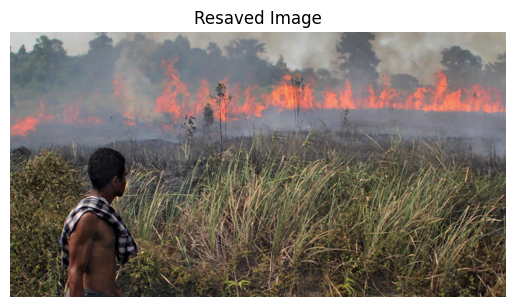

In [ ]:
from PIL import Image
import matplotlib.pyplot as plt

# File path for the original image
file_path = '/content/fire-dataset/fire_dataset/fire_images/fire.1.png'

try:
    # Open the image
    img = Image.open(file_path)

    # Save it as a new PNG file
    save_dir = '/content/fire-dataset/fire_dataset/saved/'
    os.makedirs(save_dir, exist_ok=True)
    new_file_path = '/content/fire-dataset/fire_dataset/saved/fire_resaved.png'
    img.save(new_file_path, "PNG")
    print(f"Image saved successfully as: {new_file_path}")

    # Display the resaved image
    img_resaved = Image.open(new_file_path)
    plt.imshow(img_resaved)
    plt.axis('off')  # Turn off the axes
    plt.title("Resaved Image")
    plt.show()

except Exception as e:
    print(f"Error processing the image: {e}")


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
fire_dir = '/content/fire-dataset/fire_dataset/fire_images'
non_fire_dir = '/content/fire-dataset/fire_dataset/non_fire_images'

In [ ]:
train_dir = '/content/fire-dataset/model/train'
test_dir = '/content/fire-dataset/model/test'
os.makedirs(os.path.join(train_dir, 'fire'), exist_ok=True)
os.makedirs(os.path.join(train_dir, 'non_fire'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'fire'), exist_ok=True)
os.makedirs(os.path.join(test_dir, 'non_fire'), exist_ok=True)

In [ ]:
import shutil
import random

In [ ]:
# Function to randomly split data into train and test sets
def split_data(source_dir, target_train_dir, target_test_dir, test_size=0.2):
    # Get all image file names in the source directory
    all_images = os.listdir(source_dir)
    # Shuffle the images
    random.shuffle(all_images)

    # Split the images into train and test
    split_idx = int(len(all_images) * (1 - test_size))  # index to split train and test
    train_images = all_images[:split_idx]
    test_images = all_images[split_idx:]

    # Move train images to the target train directory
    for img in train_images:
        shutil.copy(os.path.join(source_dir, img), target_train_dir)

    # Move test images to the target test directory
    for img in test_images:
        shutil.copy(os.path.join(source_dir, img), target_test_dir)

In [ ]:
# Split fire images
split_data(fire_dir, os.path.join(train_dir, 'fire'), os.path.join(test_dir, 'fire'))

# Split non-fire images
split_data(non_fire_dir, os.path.join(train_dir, 'non_fire'), os.path.join(test_dir, 'non_fire'))

print("Data has been split into train and test directories.")

Data has been split into train and test directories.


In [ ]:
IMG_HEIGHT = 224  # For detailed input, commonly used in image classification
IMG_WIDTH = 224   # Same as height for square input
BATCH_SIZE = 32  # A good starting point, it is generally a balance between memory usage and performance


In [ ]:
# Using ImageDataGenerator for training and testing
train_datagen = ImageDataGenerator(rescale=1.0/255.0, rotation_range=20, width_shift_range=0.2, height_shift_range=0.2, zoom_range=0.2, horizontal_flip=True)
val_datagen = ImageDataGenerator(rescale=1.0/255.0)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

val_generator = val_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)

Found 799 images belonging to 2 classes.
Found 201 images belonging to 2 classes.


In [ ]:
# Build the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Binary classification
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
EPOCHS = 10
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=EPOCHS
)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


25/25 ━━━━━━━━━━━━━━━━━━━━ 125s 5s/step - accuracy: 0.7562 - loss: 1.3425 - val_accuracy: 0.9055 - val_loss: 0.2995
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 126s 4s/step - accuracy: 0.9404 - loss: 0.1484 - val_accuracy: 0.9104 - val_loss: 0.2202
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 143s 4s/step - accuracy: 0.9516 - loss: 0.1411 - val_accuracy: 0.9204 - val_loss: 0.1932
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 142s 4s/step - accuracy: 0.9373 - loss: 0.1287 - val_accuracy: 0.9353 - val_loss: 0.2161
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 106s 4s/step - accuracy: 0.9450 - loss: 0.1553 - val_accuracy: 0.9254 - val_loss: 0.1694
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 141s 4s/step - accuracy: 0.9582 - loss: 0.0987 - val_accuracy: 0.9502 - val_loss: 0.2119
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 144s 4s/step - accuracy: 0.9669 - loss: 0.0846 - val_accuracy: 0.9204 - val_loss: 0.3272
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 106s 4s/step - accuracy: 0.9404 - loss: 0.1497 - val_accuracy: 0.9453 - val_loss: 0.

In [ ]:
# Evaluate the model
test_datagen = ImageDataGenerator(rescale=1.0/255.0)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary'
)
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")